In [1]:
import pandas as pd
import pandas_ta as ta
import os

# STEP 1: Get the dataframe

In [8]:
path = os.getcwd()
path

'/Users/omarhamdi/code/Stanislas-Motte/MLStocks4Everyone'

In [13]:
df = pd.read_csv(f'{path}/our_data/AAPL.csv')

In [14]:
df

,DATETIME,price
0,2010-01-04 00:00:00-05:00,6.461974
1,2010-01-05 00:00:00-05:00,6.473149
2,2010-01-06 00:00:00-05:00,6.370186
3,2010-01-07 00:00:00-05:00,6.358408
4,2010-01-08 00:00:00-05:00,6.400681
...,...,...
3600,2024-04-24 00:00:00-04:00,168.791061
3601,2024-04-25 00:00:00-04:00,169.659882
3602,2024-04-26 00:00:00-04:00,169.070679
3603,2024-04-29 00:00:00-04:00,173.264984


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATETIME  3605 non-null   object 
 1   price     3605 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.5+ KB


In [52]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

/var/folders/tp/ncsqk3px4_779jfkt1hbnj2h0000gn/T/ipykernel_68089/3960539372.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['DATETIME'] = pd.to_datetime(df['DATETIME'])


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATETIME  3605 non-null   object 
 1   price     3605 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.5+ KB


In [54]:
df.set_index('DATETIME', inplace=True)

In [55]:
df

,price
DATETIME,
2010-01-04 00:00:00-05:00,6.461974
2010-01-05 00:00:00-05:00,6.473149
2010-01-06 00:00:00-05:00,6.370186
2010-01-07 00:00:00-05:00,6.358408
2010-01-08 00:00:00-05:00,6.400681
...,...
2024-04-24 00:00:00-04:00,168.791061
2024-04-25 00:00:00-04:00,169.659882
2024-04-26 00:00:00-04:00,169.070679


# STEP 2: Create the Features

In [56]:
# List of all pandas_ta indicators
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

### Moving average

In [57]:
# Create a column with the average of the last three values of price
df['AVG_PRICE'] = df['price'].rolling(window=7).mean()

### Exponential Moving Average (EMA)

In [58]:
df['EMA'] = ta.ema(df['price'], length=7)

### Stochastic oscillator

In [59]:
# Calculate the stochastic oscillator
df['stochastic_oscillator'] = (df['price'] - df['price'].rolling(window=14).min()) / (df['price'].rolling(window=14).max() - df['price'].rolling(window=14).min())

# Multiply by 100 to get the percentage
df['stochastic_oscillator'] *= 100

In [60]:
df.head(28)

,price,AVG_PRICE,EMA,stochastic_oscillator
DATETIME,,,,
2010-01-04 00:00:00-05:00,6.461974,NaN,NaN,NaN
2010-01-05 00:00:00-05:00,6.473149,NaN,NaN,NaN
2010-01-06 00:00:00-05:00,6.370186,NaN,NaN,NaN
2010-01-07 00:00:00-05:00,6.358408,NaN,NaN,NaN
2010-01-08 00:00:00-05:00,6.400681,NaN,NaN,NaN
2010-01-11 00:00:00-05:00,6.344216,NaN,NaN,NaN
2010-01-12 00:00:00-05:00,6.272051,6.382952,6.382952,NaN
2010-01-13 00:00:00-05:00,6.360523,6.368459,6.377345,NaN
2010-01-14 00:00:00-05:00,6.323684,6.347107,6.363930,NaN


### Relative Strength Index (RSI)

In [61]:
df['RSI'] = ta.rsi(df['price'])

In [62]:
df

,price,AVG_PRICE,EMA,stochastic_oscillator,RSI
DATETIME,,,,,
2010-01-04 00:00:00-05:00,6.461974,NaN,NaN,NaN,NaN
2010-01-05 00:00:00-05:00,6.473149,NaN,NaN,NaN,NaN
2010-01-06 00:00:00-05:00,6.370186,NaN,NaN,NaN,NaN
2010-01-07 00:00:00-05:00,6.358408,NaN,NaN,NaN,NaN
2010-01-08 00:00:00-05:00,6.400681,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-04-24 00:00:00-04:00,168.791061,167.084800,167.755314,34.805190,46.706434
2024-04-25 00:00:00-04:00,169.659882,167.157558,168.231456,42.337641,48.493463
2024-04-26 00:00:00-04:00,169.070679,167.343020,168.441261,37.229401,47.334280


### Fibonacci 🤌 retracement

In [63]:
## df['fibonacci_retracement'] = df['price'] - df['AVG_PRICE'] ?????????

### Ichiboku cloud 💩☁️

In [64]:
df['Tenkan_Sen'] = (df['price'].rolling(window=9).max() + df['price'].rolling(window=9).min()) / 2
df['Kijun_Sen'] = (df['price'].rolling(window=26).max() + df['price'].rolling(window=26).min()) / 2
df['Senkou_Span_A'] = (df['Tenkan_Sen'] + df['Kijun_Sen']) / 2
df['Senkou_Span_B'] = (df['price'].rolling(window=52).max() + df['price'].rolling(window=52).min()) / 2
df['Chikou_Span'] = df['price'].shift(-26)

In [65]:
df

,price,AVG_PRICE,EMA,stochastic_oscillator,RSI,Tenkan_Sen,Kijun_Sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
DATETIME,,,,,,,,,,
2010-01-04 00:00:00-05:00,6.461974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.891597
2010-01-05 00:00:00-05:00,6.473149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.998790
2010-01-06 00:00:00-05:00,6.370186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.050423
2010-01-07 00:00:00-05:00,6.358408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.141610
2010-01-08 00:00:00-05:00,6.400681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.115944
...,...,...,...,...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,168.791061,167.084800,167.755314,34.805190,46.706434,170.543686,171.602249,171.072968,176.685356,NaN
2024-04-25 00:00:00-04:00,169.659882,167.157558,168.231456,42.337641,48.493463,168.616295,171.602249,170.109272,175.836502,NaN
2024-04-26 00:00:00-04:00,169.070679,167.343020,168.441261,37.229401,47.334280,167.218193,170.543686,168.880939,174.782928,NaN


### Average directional index (ADX)

In [66]:
#df['ADX'] = ta.adx(df['High'], df['Low'], df['Close'], length=14)

### Bolinger Bands

In [67]:
# train = df[df['DATETIME'] < '2020-01-01']
# test = df[df['DATETIME'] >= '2020-01-01']

# Compute standard deviation of price over past 20 days and add to price

# for i in range(1,11):
#     df[f'BB_SellSignal {i} %'] = df['price'] > (df['price'] + df['price'].rolling(window=20).std() * i/10)
#     df[f'BB_BuySignal {i} %'] = df['price'] < (df['price'] - df['price'].rolling(window=20).std() * i/10)

In [68]:
# df['HowMuchAbove3dAverage'] = df['price'] - df['AVG_PRICE']

In [69]:
# df

# Train test split

In [70]:
df

,price,AVG_PRICE,EMA,stochastic_oscillator,RSI,Tenkan_Sen,Kijun_Sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
DATETIME,,,,,,,,,,
2010-01-04 00:00:00-05:00,6.461974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.891597
2010-01-05 00:00:00-05:00,6.473149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.998790
2010-01-06 00:00:00-05:00,6.370186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.050423
2010-01-07 00:00:00-05:00,6.358408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.141610
2010-01-08 00:00:00-05:00,6.400681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.115944
...,...,...,...,...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,168.791061,167.084800,167.755314,34.805190,46.706434,170.543686,171.602249,171.072968,176.685356,NaN
2024-04-25 00:00:00-04:00,169.659882,167.157558,168.231456,42.337641,48.493463,168.616295,171.602249,170.109272,175.836502,NaN
2024-04-26 00:00:00-04:00,169.070679,167.343020,168.441261,37.229401,47.334280,167.218193,170.543686,168.880939,174.782928,NaN


In [71]:
df.dropna(inplace=True)

In [72]:
df

,price,AVG_PRICE,EMA,stochastic_oscillator,RSI,Tenkan_Sen,Kijun_Sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
DATETIME,,,,,,,,,,
2010-03-18 00:00:00-04:00,6.783248,6.789503,6.744353,89.014030,70.140394,6.728597,6.366863,6.547730,6.320515,8.137480
2010-03-19 00:00:00-04:00,6.710782,6.778331,6.735960,75.493047,64.169559,6.776455,6.396152,6.586304,6.320515,7.912231
2010-03-22 00:00:00-04:00,6.786268,6.775096,6.748537,89.287821,67.292934,6.776455,6.396152,6.586304,6.320515,7.898944
2010-03-23 00:00:00-04:00,6.895270,6.782688,6.785220,100.000000,71.197338,6.803026,6.422723,6.612874,6.347085,8.111514
2010-03-24 00:00:00-04:00,6.925769,6.806542,6.820357,100.000000,72.197419,6.818275,6.437972,6.628124,6.362335,7.883546
...,...,...,...,...,...,...,...,...,...,...
2024-03-18 00:00:00-04:00,173.484695,172.220692,172.681827,38.003258,40.294116,171.127892,178.682648,174.905270,181.719154,168.791061
2024-03-19 00:00:00-04:00,175.841492,172.983943,173.471743,60.255265,46.610094,172.306290,177.833794,175.070042,181.719154,169.659882
2024-03-20 00:00:00-04:00,178.427994,173.828513,174.710806,90.712918,52.543385,174.463364,176.780220,175.621792,181.719154,169.070679


In [97]:
#This is the stock price
df['price']


DATETIME
2010-03-18 00:00:00-04:00      6.783248
2010-03-19 00:00:00-04:00      6.710782
2010-03-22 00:00:00-04:00      6.786268
2010-03-23 00:00:00-04:00      6.895270
2010-03-24 00:00:00-04:00      6.925769
                                ...    
2024-03-18 00:00:00-04:00    173.484695
2024-03-19 00:00:00-04:00    175.841492
2024-03-20 00:00:00-04:00    178.427994
2024-03-21 00:00:00-04:00    171.137878
2024-03-22 00:00:00-04:00    172.046646
Name: price, Length: 3528, dtype: float64

In [98]:
#This is the daily return, i.e what you would make in % terms if you had bought the stock
(df['price'] / df['price'].shift(1) -1)*100

DATETIME
2010-03-18 00:00:00-04:00         NaN
2010-03-19 00:00:00-04:00   -1.068314
2010-03-22 00:00:00-04:00    1.124849
2010-03-23 00:00:00-04:00    1.606209
2010-03-24 00:00:00-04:00    0.442317
                               ...   
2024-03-18 00:00:00-04:00    0.637238
2024-03-19 00:00:00-04:00    1.358504
2024-03-20 00:00:00-04:00    1.470928
2024-03-21 00:00:00-04:00   -4.085746
2024-03-22 00:00:00-04:00    0.531015
Name: price, Length: 3528, dtype: float64

In [109]:
df['daily_return'] = (df['price'] / df['price'].shift(1) -1)

# Set up the model

In [155]:
# Drop nas
df = df.dropna()

X = pd.DataFrame(df.drop(['price'], axis=1))
X = X.drop(['daily_return'], axis=1)
y = pd.DataFrame(df['daily_return'])

In [156]:
X

,AVG_PRICE,EMA,stochastic_oscillator,RSI,Tenkan_Sen,Kijun_Sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
DATETIME,,,,,,,,,
2010-03-19 00:00:00-04:00,6.778331,6.735960,75.493047,64.169559,6.776455,6.396152,6.586304,6.320515,7.912231
2010-03-22 00:00:00-04:00,6.775096,6.748537,89.287821,67.292934,6.776455,6.396152,6.586304,6.320515,7.898944
2010-03-23 00:00:00-04:00,6.782688,6.785220,100.000000,71.197338,6.803026,6.422723,6.612874,6.347085,8.111514
2010-03-24 00:00:00-04:00,6.806542,6.820357,100.000000,72.197419,6.818275,6.437972,6.628124,6.362335,7.883546
2010-03-25 00:00:00-04:00,6.816032,6.826177,73.566014,65.592530,6.818275,6.437972,6.628124,6.362335,8.042371
...,...,...,...,...,...,...,...,...,...
2024-03-18 00:00:00-04:00,172.220692,172.681827,38.003258,40.294116,171.127892,178.682648,174.905270,181.719154,168.791061
2024-03-19 00:00:00-04:00,172.983943,173.471743,60.255265,46.610094,172.306290,177.833794,175.070042,181.719154,169.659882
2024-03-20 00:00:00-04:00,173.828513,174.710806,90.712918,52.543385,174.463364,176.780220,175.621792,181.719154,169.070679


In [157]:
y

,daily_return
DATETIME,
2010-03-19 00:00:00-04:00,-0.010683
2010-03-22 00:00:00-04:00,0.011248
2010-03-23 00:00:00-04:00,0.016062
2010-03-24 00:00:00-04:00,0.004423
2010-03-25 00:00:00-04:00,-0.011859
...,...
2024-03-18 00:00:00-04:00,0.006372
2024-03-19 00:00:00-04:00,0.013585
2024-03-20 00:00:00-04:00,0.014709


In [161]:
# Import linear regression from sklearn
from sklearn.linear_model import LinearRegression
#Import random forest regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = False)

# Create a linear regression model
model = AdaBoostRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)


#Get the mean aboslute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, model.predict(X_test))

# Make predictions on the test data
predictions = model.predict(X_test)


# Check the predictions of returns vs the actual returns
predictions = pd.DataFrame(predictions, index=y_test.index, columns=['predicted_return'])

/Users/stan.motte/.pyenv/versions/3.10.6/envs/MLStocks4Everyone/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
mae

0.013573760166798237

0.0003157471406532413
0.018511458112062056
-0.0015779409997011594


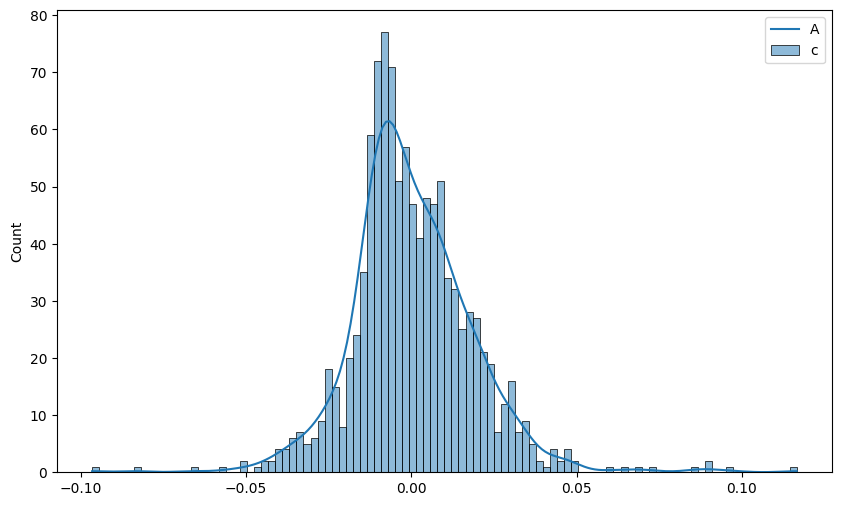

In [168]:
#Plot the distribution of the diffrence between the actual return vs the predicted return

import matplotlib.pyplot as plt
import seaborn as sns

diff = y_test['daily_return'] - predictions['predicted_return']
print(diff.mean())
print(diff.std())
print(diff.median())

plt.figure(figsize=(10, 6))
sns.histplot(y_test['daily_return'] - predictions['predicted_return'], bins=100, kde=True)
plt.legend('Actual vs Predicted Returns')
plt.show()


In [159]:
predictions['actual_return'] = y_test
predictions

,predicted_return,actual_return
DATETIME,,
2020-01-08 00:00:00-05:00,0.016575,0.016086
2020-01-09 00:00:00-05:00,0.016575,0.021241
2020-01-10 00:00:00-05:00,0.016575,0.002261
2020-01-13 00:00:00-05:00,0.016575,0.021364
2020-01-14 00:00:00-05:00,0.006858,-0.013503
...,...,...
2024-03-18 00:00:00-04:00,0.006858,0.006372
2024-03-19 00:00:00-04:00,0.000615,0.013585
2024-03-20 00:00:00-04:00,0.006858,0.014709


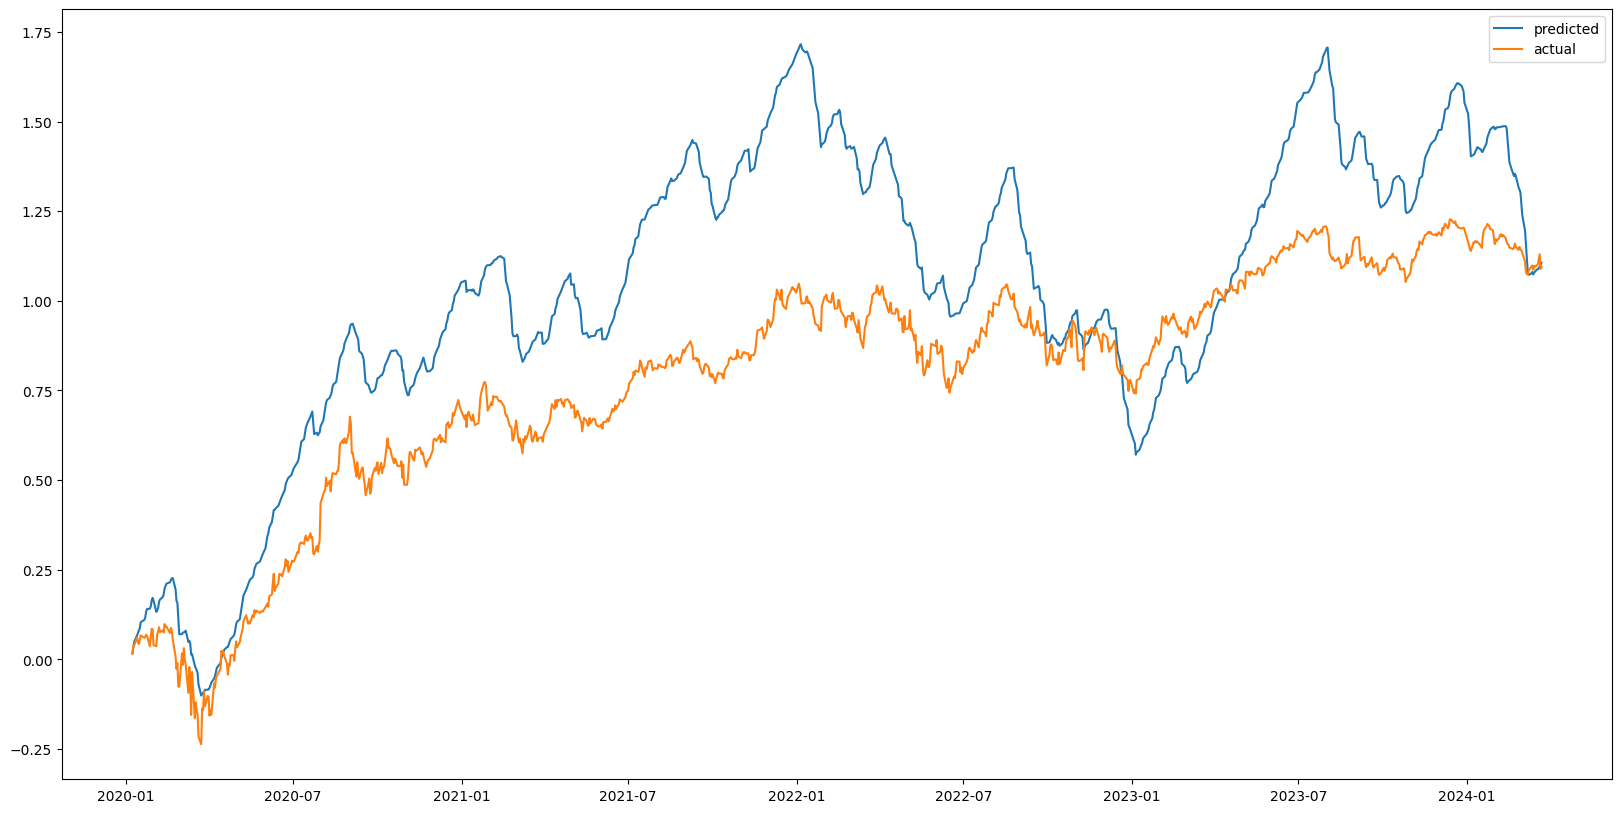

In [160]:
#Plot the cumulative returns according to the model and then according to the actual returns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(predictions['predicted_return'].cumsum(), label='predicted')
plt.plot(predictions['actual_return'].cumsum(), label='actual')

plt.legend()
plt.show()

In [113]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [93]:
y_train

,price
DATETIME,
2010-03-18 00:00:00-04:00,6.783248
2010-03-19 00:00:00-04:00,6.710782
2010-03-22 00:00:00-04:00,6.786268
2010-03-23 00:00:00-04:00,6.895270
2010-03-24 00:00:00-04:00,6.925769
...,...
2019-12-31 00:00:00-05:00,71.332924
2020-01-02 00:00:00-05:00,72.960449
2020-01-03 00:00:00-05:00,72.251152


In [76]:
split_index = int(0.7*len(df))

In [77]:
X_train = df.iloc[:split_index]
X_test = df.iloc[split_index:]

In [78]:
y_train = X_train[['price']]
y_test = X_test[['price']]

In [79]:
X_train = X_train.drop(columns=['price'])
X_test = X_test.drop(columns=['price'])

In [80]:
y_train

,price
DATETIME,
2010-03-18 00:00:00-04:00,6.783248
2010-03-19 00:00:00-04:00,6.710782
2010-03-22 00:00:00-04:00,6.786268
2010-03-23 00:00:00-04:00,6.895270
2010-03-24 00:00:00-04:00,6.925769
...,...
2019-12-31 00:00:00-05:00,71.332924
2020-01-02 00:00:00-05:00,72.960449
2020-01-03 00:00:00-05:00,72.251152


# Step 4: Create your target variable : what you want to predict --> Future returns %

In [42]:
#Make target the daily returns
#df['target'] = ((df['Price'] / df['price'].shift(-1)) - 1)*100

In [43]:
#df['price']

In [44]:
#df['price'].shift(-1)

In [45]:
# Create a DataFrame so 'ta' can be used.
df = pd.DataFrame()

# Help about this, 'ta', extension
#help(df.ta)

# List of all indicators
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [81]:
# Help about an indicator such as bbands
help(ta.accbands)

Help on function accbands in module pandas_ta.volatility.accbands:

accbands(high, low, close, length=None, c=None, drift=None, mamode=None, offset=None, **kwargs)
    Acceleration Bands (ACCBANDS)
    
    Acceleration Bands created by Price Headley plots upper and lower envelope
    bands around a simple moving average.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/acceleration-bands-abands/
    
    Calculation:
        Default Inputs:
            length=10, c=4
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        HL_RATIO = c * (high - low) / (high + low)
        LOW = low * (1 - HL_RATIO)
        HIGH = high * (1 + HL_RATIO)
    
        if 'ema':
            LOWER = EMA(LOW, length)
            MID = EMA(close, length)
            UPPER = EMA(HIGH, length)
        else:
            LOWER = SMA(LOW, length)
            MID = SMA(close, length)
            UPPER = SMA(HIGH, length)
    
   